In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
def load_scws(rid):
    print("loading "+rid+"...")
    df1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_scw_envs_df.csv")
    df2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_non_scw_envs_df.csv")
    
    df1["cluster_new"] = df1.cluster.map({1:2,2:1,0:0})
    df1 = df1.set_index(pd.DatetimeIndex(df1.dt_utc))
    df1["month"] = df1.index.month
    df1["hour"] = df1.index.hour
    df1["year"] = df1.index.year
    df1["aspect_ratio"] = df1.major_axis_length / df1.minor_axis_length    
    
    df2["cluster_new"] = df2.cluster.map({1:2,2:1,0:0})
    df2 = df2.set_index(pd.DatetimeIndex(df2.dt_utc))
    df2["month"] = df2.index.month
    df2["hour"] = df2.index.hour
    df2["year"] = df2.index.year    
    df2["aspect_ratio"] = df2.major_axis_length / df2.minor_axis_length     
    
    df1["rid"] = rid
    df2["rid"] = rid
    
    return df1, df2

In [3]:
melb_scw, melb_null = load_scws("2")
bris_scw, bris_null = load_scws("66")
namoi_scw, namoi_null = load_scws("69")
perth_scw, perth_null = load_scws("70")
syd_scw, syd_null = load_scws("71")

loading 2...
loading 66...
loading 69...
loading 70...
loading 71...


In [4]:
var = ["qmean01","s06","lr13","Umean06","cluster_new"]
df_scw = pd.concat([melb_scw[var], perth_scw[var], syd_scw[var], namoi_scw[var], bris_scw[var]],axis=0)
df_all = pd.concat([df_scw[var], melb_null[var], perth_null[var], syd_null[var], namoi_null[var], bris_null[var]],axis=0)


In [5]:
def print_events(df,name):
    print(name,": ",df.shape)
    
[print_events(d,n) for d,n in zip([melb_scw,bris_scw,namoi_scw,perth_scw,syd_scw,df_scw],["MELB","BRIS","NAMOI","PERTH","SYD","ALL"])]

MELB :  (156, 174)
BRIS :  (29, 174)
NAMOI :  (56, 174)
PERTH :  (51, 174)
SYD :  (80, 174)
ALL :  (372, 5)


[None, None, None, None, None, None]

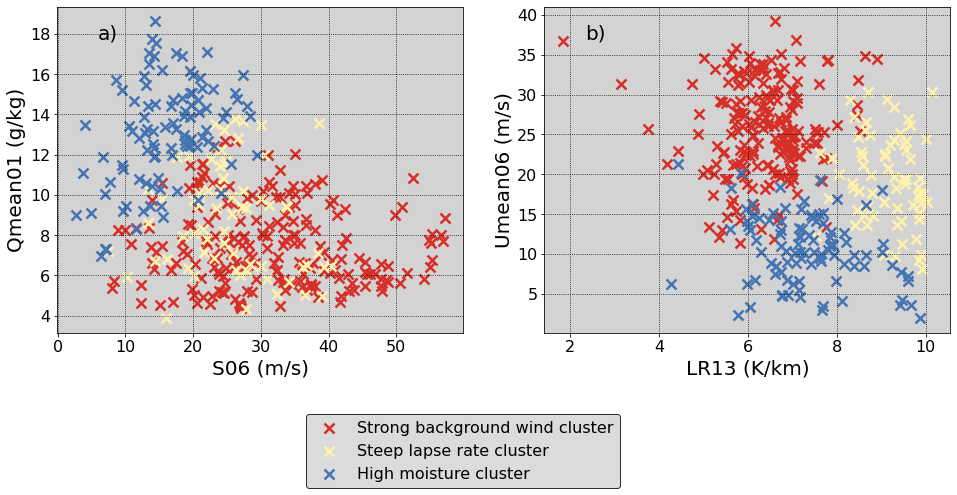

In [6]:
def get_2dhist(df):
    x_s06 = np.arange(0,42.5,2.5)
    y_qmean01 = np.arange(2,18,1)
    H1, xe_s06, ye_qmean01 = np.histogram2d(df.s06.values, df.qmean01.values, bins=[x_s06,y_qmean01],density=False)
    H1 = H1/(H1.sum()) * 100
    xc_s06 = np.array([(x_s06[i]+x_s06[i+1])/2 for i in np.arange(x_s06.shape[0]-1)])
    yc_qmean01 = np.array([(y_qmean01[i]+y_qmean01[i+1])/2 for i in np.arange(y_qmean01.shape[0]-1)])
    
    x_lr13 = np.arange(0,12,1)
    y_umean06 = np.arange(-2,27.5,2.5)
    H2, xe_lr13, ye_umean06 = np.histogram2d(df.lr13.values, df.Umean06.values, bins=[x_lr13,y_umean06],density=False)
    H2 = H2/(H2.sum()) * 100
    xc_lr13 = np.array([(x_lr13[i]+x_lr13[i+1])/2 for i in np.arange(x_lr13.shape[0]-1)])
    yc_umean06 = np.array([(y_umean06[i]+y_umean06[i+1])/2 for i in np.arange(y_umean06.shape[0]-1)])    
    
    return xc_s06, yc_qmean01, H1, xc_lr13, yc_umean06, H2



p=[plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]
plt.figure(figsize=[16,6])


levs=np.arange(0.5,4,0.5)

plt.subplot(1,2,1)
# xc_s06, yc_qmean01, H1, xc_lr13, yc_umean06, H2 = get_2dhist(df_all.query("cluster_new==0"))
# plt.contour(xc_s06,yc_qmean01,H1.T,colors=[p[0]],levels=levs)

# xc_s06, yc_qmean01, H1, xc_lr13, yc_umean06, H2 = get_2dhist(df_all.query("cluster_new==1"))
# plt.contour(xc_s06,yc_qmean01,H1.T,colors=[p[1]],levels=levs)

# xc_s06, yc_qmean01, H1, xc_lr13, yc_umean06, H2 = get_2dhist(df_all.query("cluster_new==2"))
# plt.contour(xc_s06,yc_qmean01,H1.T,colors=[p[2]],levels=levs)

plt.gca().set_facecolor("lightgray")
plt.ylabel("Qmean01")
plt.xlabel("S06")


plt.scatter(df_scw.query("cluster_new==0").s06, df_scw.query("cluster_new==0").qmean01,color=p[0],marker="x",s=100,linewidths=2.5,label="Strong background wind cluster")
plt.scatter(df_scw.query("cluster_new==1").s06, df_scw.query("cluster_new==1").qmean01,color=p[1],marker="x",s=100,linewidths=2.5,label="Steep lapse rate cluster")
plt.scatter(df_scw.query("cluster_new==2").s06, df_scw.query("cluster_new==2").qmean01,color=p[2],marker="x",s=100,linewidths=2.5,label="High moisture cluster")
plt.gca().grid(color="k",ls=":")
plt.gca().tick_params("both",labelsize=16)
plt.gca().set_ylabel("Qmean01 (g/kg)",size=20)
plt.gca().set_xlabel("S06 (m/s)",size=20)
plt.gca().text(0.1,0.9,"a)",transform=plt.gca().transAxes,size=20)

l=plt.legend(loc=8,fontsize=16,bbox_to_anchor=(1,-0.5),facecolor='lightgray',edgecolor="k")


levs=np.arange(1,11,1.5)
#levs=None

plt.subplot(1,2,2)
# xc_s06, yc_qmean01, H1, xc_lr13, yc_umean06, H2 = get_2dhist(df_all.query("cluster_new==0"))
# plt.contour(xc_lr13,yc_umean06,H2.T,colors=[p[0]],levels=levs)

# xc_s06, yc_qmean01, H1, xc_lr13, yc_umean06, H2 = get_2dhist(df_all.query("cluster_new==1"))
# plt.contour(xc_lr13,yc_umean06,H2.T,colors=[p[1]],levels=levs)

# xc_s06, yc_qmean01, H1, xc_lr13, yc_umean06, H2 = get_2dhist(df_all.query("cluster_new==2"))
# plt.contour(xc_lr13,yc_umean06,H2.T,colors=[p[2]],levels=levs)

plt.gca().set_facecolor("lightgray")
plt.ylabel("Umean06")
plt.xlabel("LR13")

plt.scatter(df_scw.query("cluster_new==0").lr13, df_scw.query("cluster_new==0").Umean06,color=p[0],marker="x",s=100,linewidths=2.5)
plt.scatter(df_scw.query("cluster_new==1").lr13, df_scw.query("cluster_new==1").Umean06,color=p[1],marker="x",s=100,linewidths=2.5)
plt.scatter(df_scw.query("cluster_new==2").lr13, df_scw.query("cluster_new==2").Umean06,color=p[2],marker="x",s=100,linewidths=2.5)
plt.gca().grid(color="k",ls=":")
plt.gca().tick_params("both",labelsize=16)
plt.gca().set_ylabel("Umean06 (m/s)",size=20)
plt.gca().set_xlabel("LR13 (K/km)",size=20)
plt.gca().text(0.1,0.9,"b)",transform=plt.gca().transAxes,size=20)

plt.savefig("/g/data/eg3/ab4502/ExtremeWind/systematic_clusters.jpeg",dpi=400,bbox_inches="tight")

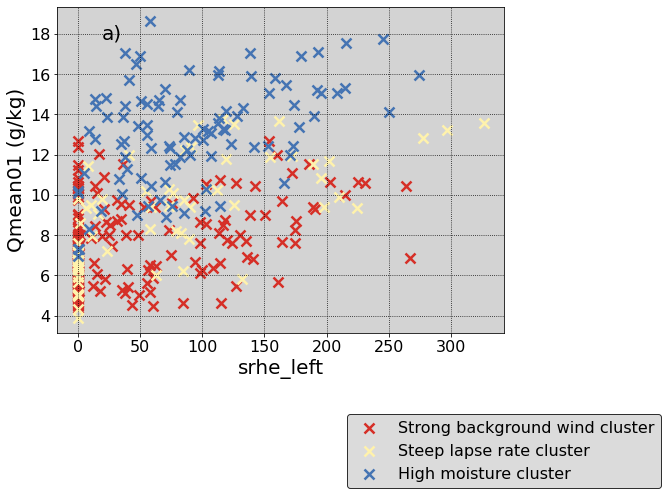

In [35]:
v="srhe_left"
df_scw2 = pd.concat([melb_scw[[v,"qmean01","cluster_new"]],
                     perth_scw[[v,"qmean01","cluster_new"]],
                     syd_scw[[v,"qmean01","cluster_new"]],
                     namoi_scw[[v,"qmean01","cluster_new"]],
                     bris_scw[[v,"qmean01","cluster_new"]]],axis=0)

levs=np.arange(0.5,4,0.5)

plt.figure(figsize=[8,6])

plt.gca().set_facecolor("lightgray")
plt.ylabel("Qmean01")
plt.xlabel(v)


plt.scatter(df_scw2.query("cluster_new==0")[v], df_scw2.query("cluster_new==0").qmean01,color=p[0],marker="x",s=100,linewidths=2.5,label="Strong background wind cluster")
plt.scatter(df_scw2.query("cluster_new==1")[v], df_scw2.query("cluster_new==1").qmean01,color=p[1],marker="x",s=100,linewidths=2.5,label="Steep lapse rate cluster")
plt.scatter(df_scw2.query("cluster_new==2")[v], df_scw2.query("cluster_new==2").qmean01,color=p[2],marker="x",s=100,linewidths=2.5,label="High moisture cluster")
plt.gca().grid(color="k",ls=":")
plt.gca().tick_params("both",labelsize=16)
plt.gca().set_ylabel("Qmean01 (g/kg)",size=20)
plt.gca().set_xlabel(v,size=20)
plt.gca().text(0.1,0.9,"a)",transform=plt.gca().transAxes,size=20)

l=plt.legend(loc=8,fontsize=16,bbox_to_anchor=(1,-0.5),facecolor='lightgray',edgecolor="k")

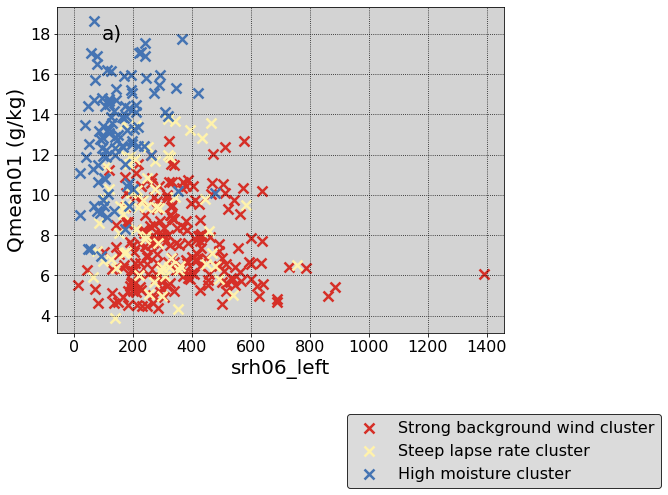

In [38]:
v="srh06_left"
df_scw2 = pd.concat([melb_scw[[v,"qmean01","cluster_new"]],
                     perth_scw[[v,"qmean01","cluster_new"]],
                     syd_scw[[v,"qmean01","cluster_new"]],
                     namoi_scw[[v,"qmean01","cluster_new"]],
                     bris_scw[[v,"qmean01","cluster_new"]]],axis=0)

levs=np.arange(0.5,4,0.5)

plt.figure(figsize=[8,6])

plt.gca().set_facecolor("lightgray")
plt.ylabel("Qmean01")
plt.xlabel(v)


plt.scatter(df_scw2.query("cluster_new==0")[v], df_scw2.query("cluster_new==0").qmean01,color=p[0],marker="x",s=100,linewidths=2.5,label="Strong background wind cluster")
plt.scatter(df_scw2.query("cluster_new==1")[v], df_scw2.query("cluster_new==1").qmean01,color=p[1],marker="x",s=100,linewidths=2.5,label="Steep lapse rate cluster")
plt.scatter(df_scw2.query("cluster_new==2")[v], df_scw2.query("cluster_new==2").qmean01,color=p[2],marker="x",s=100,linewidths=2.5,label="High moisture cluster")
plt.gca().grid(color="k",ls=":")
plt.gca().tick_params("both",labelsize=16)
plt.gca().set_ylabel("Qmean01 (g/kg)",size=20)
plt.gca().set_xlabel(v,size=20)
plt.gca().text(0.1,0.9,"a)",transform=plt.gca().transAxes,size=20)

l=plt.legend(loc=8,fontsize=16,bbox_to_anchor=(1,-0.5),facecolor='lightgray',edgecolor="k")